<a href="https://colab.research.google.com/github/snehamehrin/Customer-Segmentation/blob/master/Copy_of_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Segmentation / future business prospects **

## Goal: We will be classifying customers data into groups of similar habits, interests, products they purchase and so on, to gain a deeper understanding of how we can improve the workflow to benefit our business having happier customers. This could reveal more questions along the way with each perhaps being a new project. 


In [0]:
##Importing Libraries

import pandas as pd
from datetime import datetime 
import seaborn as sns
import re
import difflib
from difflib import SequenceMatcher
import string
!pip install beautifulsoup4
!pip install google
from googlesearch import search 
import requests
!pip install fuzzy
import fuzzy
import nltk
import bs4
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
import itertools
from nltk.util import ngrams

  Stored in directory: /root/.cache/pip/wheels/79/f7/14/b7e20855729780e85322529469b2d1eadfd940e83d981373cc
Successfully built fuzzy
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
#Importing File
from google.colab import files
uploaded = files.upload()

Saving yyc manifest history bestbuy.csv to yyc manifest history bestbuy.csv


In [0]:
#Reading Data
train_data=pd.read_csv('yyc manifest history bestbuy.csv')

##1)EXPLORING DATA

In [0]:
#Checking the first few columns
train_data.head()

,Client,Date,Invoice #,Pick up,Window_Start,Window_End,Pick Up Location,City/Town,Customer Name,Delivery Team,Product Information,Comments,Unnamed: 12
0,NaN,2001-Aug.-18,900-907325 VIP LE,Bestbuy,11:00,14:00,CDS Warehouse 5811 46 Street SE,Calgary,James Attwood,Adam / Musa,"GE 5.3CF TOP LD WSHR WH, GE 7.4 CF DRYER",NaN,NaN
1,NaN,2001-Aug.-18,976-416905,Bestbuy,11:30,14:30,CDS Warehouse 5811 46 Street SE,CALGARY,lynch marilyn,Adam / Musa,"BOSCH 24"" 300S BAR DISHWSH",1 X REMOVAL,NaN
2,NaN,2001-Aug.-18,947-417497 PICK UP / RETURN,Bestbuy,12:00,15:00,127 CANTRELL PL SW *Call Cx 30 minutes before ...,CALGARY,Gevin Bebault,Adam / Musa,"FRIGIDAIRE 24"" DISHWASHER",DAMAGE Was dropped (damaged). Exchanging for a...,NaN
3,NaN,2001-Aug.-18,947-417497 DELIVER,Bestbuy,12:00,15:00,CDS Warehouse 5811 46 Street SE,CALGARY,Gevin Bebault,Adam / Musa,"FRIGIDAIRE 24"" DSHWSHR SS",NaN,NaN
4,NaN,2001-Aug.-18,900-905868,Bestbuy,13:00,16:00,CDS Warehouse 5811 46 Street SE,Calgary,George Popovic,Adam / Musa,INSIGNIA 18 TOP MOUNT FRIDGE,NO UNIT #?? and could not get intouch with cus...,NaN


In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7520 entries, 0 to 7519
Data columns (total 13 columns):
Client                 7431 non-null object
Date                   7509 non-null object
Invoice #              7507 non-null object
Pick up                7510 non-null object
Window_Start           7479 non-null object
Window_End             6700 non-null object
Pick Up Location       7511 non-null object
City/Town              7509 non-null object
Customer Name          7508 non-null object
Delivery Team          7272 non-null object
Product Information    7500 non-null object
Comments               4095 non-null object
Unnamed: 12            5 non-null object
dtypes: object(13)
memory usage: 763.8+ KB


In [0]:
#Dropping Unwanted columns
train_data=train_data.drop(columns=['Unnamed: 12'])

In [0]:
#Giving proper name to columns
train_data.rename(columns={'Invoice #':'Invoice','City/Town':'City'},inplace=True)

In [0]:
#Checking the columns

train_data.columns

Index(['Client', 'Date', 'Invoice', 'Pick up', 'Window_Start', 'Window_End',
       'Pick Up Location', 'City', 'Customer Name', 'Delivery Team',
       'Product Information', 'Comments'],
      dtype='object')

In [0]:
#Checking for null values
train_data.isnull().sum()

Client                   89
Date                     11
Invoice                  13
Pick up                  10
Window_Start             41
Window_End              820
Pick Up Location          9
City                     11
Customer Name            12
Delivery Team           248
Product Information      20
Comments               3425
dtype: int64

In [0]:
#Drop rows where all elements are missing

train_data.dropna(how='all',inplace=True)

In [0]:
#Checking how many null values are remaining
train_data.isnull().sum()

Client                   80
Date                      2
Invoice                   4
Pick up                   1
Window_Start             32
Window_End              811
Pick Up Location          0
City                      2
Customer Name             3
Delivery Team           239
Product Information      11
Comments               3416
dtype: int64

###Observations

There are still null values.

We will replace them with meaningful values after we check each column seperately

##3)DATA WRANGLING

In [0]:
#Function to remove punctuation
def remove_punctuation(x):
  cleantext=re.sub('[^\w\s+\d+,]'," ",x)
  return cleantext

In [0]:
#Function to remove digits

def remove_digits(x):
  cleantext=re.sub(r'\d+',' ',x)
  return cleantext


In [0]:
#Function to Remove Stop words
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
def remove_stopwords(x):
  words=nltk.word_tokenize(x)
  token_words=[x for x in words if not x in stopwords]
  token_words=' '.join(token_words)
  return token_words

In [0]:
#Function to remove duplicate spaces

def remove_duplicatespaces(x):
  
  cleantext=re.sub('[\s*?]{2,}',' ',x)
  return cleantext

In [0]:
#Function to remove space before comma
def remove_space_beforecomma(x):
  clean_text=re.sub(r'( , )',',',x)
  return clean_text

In [0]:
#Finding misspelled words
from difflib import get_close_matches

def fix_typoerror(x,correct_words):
  correct_word=get_close_matches(x,correct_words,n=1,cutoff=0.6)
  if len(correct_word)!=0:
    return correct_word[0]
  else:
      return x

###3.1 CLIENT

In [0]:
train_data['Client'].unique()

array([nan, 'BestBuy', 'Best Buy', 'Bestbuy', 'Bestuy', 'Betsbuy',
       'Betsbuy ', 'Bestbuy ', 'BB DTV', 'bestbuy ', 'BBDTV ', 'BBDTV',
       'Same Day BB', 'Best buy ', 'best Buy', 'BB DTV ', 'bestbuy',
       'Best Buy ', 'BB Same Day', '319-524778', 'BBSameday ',
       'BB Sameday ', 'Best buy'], dtype=object)

In [0]:
train_data['Client'].value_counts()

Best Buy       4836
BestBuy        1232
Bestbuy        1080
Betsbuy          98
Betsbuy          81
Bestbuy          62
BB DTV           15
BB DTV            6
BBDTV             3
Best buy          3
bestbuy           2
Same Day BB       2
Bestuy            2
BB Sameday        1
bestbuy           1
BBSameday         1
BBDTV             1
Best buy          1
319-524778        1
best Buy          1
BB Same Day       1
Best Buy          1
Name: Client, dtype: int64

In [0]:

#Applying Spelling Check
correct_list=['BestBuy','BBDTV','BBSameday']

train_data['Client1']=train_data['Client'].astype(str).apply(lambda x : fix_typoerror(x,correct_list))

In [0]:
train_data['Client1'].value_counts()


BestBuy       7400
nan             80
BBDTV           25
BBSameday        5
319-524778       1
Name: Client1, dtype: int64

There are 89 null values in Client which will need to be checked

In [0]:
##Drop Client column
train_data_cleaned=train_data

###3.2 DATE

In [0]:
#Type of Date column
print("Type of Date field is ",train_data_cleaned['Date'].dtype,"\n\n\n")
#Check different types of text data in this column
train_data_cleaned['Date'].value_counts()

Type of Date field is  object 





########         421
January 5        135
January 3        129
January 4        120
December 1       106
January 2         93
November 29       92
November 28       92
November 30       89
December 4        84
December 29       79
December 5        78
December 8        74
January 9         74
December 12       73
2008-Sep.-18      67
December 28       67
22-Aug.-18        66
2009-Aug.-18      66
2006-Sep.-18      66
December 6        65
December 13       63
October 24        61
October 13        61
26-Sep.-18        60
19-Sep.-18        58
January 11        58
January 12        57
November 14       55
January 10        54
                ... 
May 1              2
December 3         2
March 17           2
9-Oct.-09          1
2018-Oct.-20       1
04-Dec.-18         1
2002-Sep.-18       1
November 19        1
oct 17th           1
March 24           1
February 3         1
December 31        1
13-Aug.-18         1
Dcember 5          1
13-Oct.-18         1
November 11        1
Oct 27th     

###Observations
It looks like the data in the date column is very inconsistent.

We will extract only the first three letters of the month 

In [0]:
def preprocess_date(x):
  if re.search(r'[A-Za-z]',x):
    word=''.join(re.findall(r'[A-Za-z]{3}',x)[0])
    word=word.title()
    return word
  else:
    return "No Date"

In [0]:
train_data_cleaned['Date1']=train_data_cleaned['Date'].astype(str).apply(preprocess_date)

In [0]:
train_data_cleaned.head()

,Client,Date,Invoice,Pick up,Window_Start,Window_End,Pick Up Location,City,Customer Name,Delivery Team,Product Information,Comments,Client1,Date1
0,NaN,2001-Aug.-18,900-907325 VIP LE,Bestbuy,11:00,14:00,CDS Warehouse 5811 46 Street SE,Calgary,James Attwood,Adam / Musa,"GE 5.3CF TOP LD WSHR WH, GE 7.4 CF DRYER",NaN,nan,Aug
1,NaN,2001-Aug.-18,976-416905,Bestbuy,11:30,14:30,CDS Warehouse 5811 46 Street SE,CALGARY,lynch marilyn,Adam / Musa,"BOSCH 24"" 300S BAR DISHWSH",1 X REMOVAL,nan,Aug
2,NaN,2001-Aug.-18,947-417497 PICK UP / RETURN,Bestbuy,12:00,15:00,127 CANTRELL PL SW *Call Cx 30 minutes before ...,CALGARY,Gevin Bebault,Adam / Musa,"FRIGIDAIRE 24"" DISHWASHER",DAMAGE Was dropped (damaged). Exchanging for a...,nan,Aug
3,NaN,2001-Aug.-18,947-417497 DELIVER,Bestbuy,12:00,15:00,CDS Warehouse 5811 46 Street SE,CALGARY,Gevin Bebault,Adam / Musa,"FRIGIDAIRE 24"" DSHWSHR SS",NaN,nan,Aug
4,NaN,2001-Aug.-18,900-905868,Bestbuy,13:00,16:00,CDS Warehouse 5811 46 Street SE,Calgary,George Popovic,Adam / Musa,INSIGNIA 18 TOP MOUNT FRIDGE,NO UNIT #?? and could not get intouch with cus...,nan,Aug


In [0]:
#Manually fix any inconsistent data
train_data_cleaned.loc[train_data_cleaned['Date1']=='Dce','Date1']='Dec'

In [0]:
#Check if the data is consistent or not
train_data_cleaned['Date1'].value_counts()

Jan        1255
Dec        1149
Nov         864
Oct         689
Mar         689
Apr         662
Aug         634
Sep         614
Feb         526
No Date     425
Nan           2
May           2
Name: Date1, dtype: int64

##3.3 INVOICE

In [0]:
train_data_cleaned['Invoice'].value_counts()

741419103    6
741480407    6
741637480    6
976462760    6
945463846    6
741637625    6
902422219    6
741412445    6
             5
900958623    5
746062964    5
902426541    5
947489558    5
746636198    5
976417353    5
998651048    5
319560966    5
960405231    5
976401146    5
976408930    5
746421138    4
976418428    4
945430260    4
960426136    4
945421734    4
945429126    4
319551371    4
976480304    4
900922791    4
900969212    4
            ..
900931242    1
976410137    1
900933789    1
741481107    1
900900519    1
947486951    1
900946878    1
900924571    1
900957314    1
741480253    1
741480460    1
900982785    1
49087331     1
947488819    1
746636816    1
900926748    1
746636012    1
741480095    1
976480007    1
947600399    1
947413582    1
900950256    1
945431609    1
741481641    1
900992181    1
947487507    1
960300874    1
746636898    1
746634644    1
902482257    1
Name: Invoice, Length: 6011, dtype: int64

In [0]:
train_data_cleaned['Invoice1']=train_data_cleaned['Invoice'].astype(str).apply(lambda x : ''.join(re.findall(r'[A-Za-z]',x)))
train_data_cleaned['Invoice']=train_data_cleaned['Invoice'].astype(str).apply(lambda x : ''.join(re.findall(r'[\d+]',x)))

In [0]:
train_data_cleaned.loc[train_data_cleaned['Invoice']=='741637480']


,Client,Date,Invoice,Pick up,Window_Start,Window_End,Pick Up Location,City,Customer Name,Delivery Team,Product Information,Comments,Client1,Date1,Invoice1
1036,Best Buy,########,741637480,Bestbuy,13:00,16:00,741 Shawnessy,Calgary,Darren Price,Jordan / Tony K,samsung 30' range,NaN,BestBuy,No Date,pickup
1209,Best Buy,19-Sep.-18,741637480,Bestbuy,15:00,18:00,cds wh,Foothills,Darren Price,Jordan / Anthony,samsung 30' range,Call the cx before leaving to attempt delivery...,BestBuy,Sep,delivery
1511,Bestbuy,########,741637480,Bestbuy,12:00,15:00,CDS Warehouse,Foothills,Darren Price,YYC8,samsung 30' range,Call the cx before leaving to attempt delivery...,BestBuy,No Date,RETURN
1696,Bestbuy,29 sept,741637480,Bestbuy,12:00,15:00,CDS Warehouse,Foothills,Darren Price,YYC8,samsung 30' range,Call the cx before leaving to attempt delivery...,BestBuy,Sep,RETURN
1815,Betsbuy,October 5,741637480,Bestbuy,5:30 p.m.,8:30 p.m.,741 Shawnessy,CALGARY,Darren Price,YYC7,"RANGE, MICROWAVE, SAMSUNG FRIDGE",NaN,BestBuy,Oct,PICKUP
1839,Bestbuy,October 6,741637480,Bestbuy,3:30 p.m.,6:30 p.m.,CDS Warehouse 5811 46 Street SE,Foothills,Darren Price,YYC8,"RANGE, MICROWAVE, SAMSUNG FRIDGE",this is a large fridge and the client has a wa...,BestBuy,Oct,DELIVER


In [0]:
train_data_cleaned['Invoice1'].value_counts()

                                                                              6198
PICKUPRETURN                                                                   439
DELIVER                                                                        378
PICKUP                                                                         182
RETURN                                                                          54
delivery                                                                        20
pickup                                                                          18
DELIVERY                                                                        13
VIP                                                                              8
Delivery                                                                         7
PICKUPRETURNS                                                                    7
return                                                                           5
nan 

In [0]:
#Applying Spelling Check
correct_list=['DELIVER','PICKUP','SPECIALTIMEREQUEST','RETURN','DONOTBILL']
train_data['Invoice1']=train_data['Invoice1'].astype(str).apply(lambda x : x.upper())

train_data['Invoice1']=train_data['Invoice1'].astype(str).apply(lambda x : fix_typoerror(x,correct_list))

In [0]:
train_data['Invoice1'].value_counts()

                                                                                           6198
RETURN                                                                                      512
DELIVER                                                                                     430
PICKUP                                                                                      206
SPECIALTIMEREQUEST                                                                           92
VIP                                                                                           8
DONOTBILL                                                                                     7
DIS                                                                                           5
NAN                                                                                           4
VIPLE                                                                                         2
PRODUCTUNDERORDERNUMBER                 

###3.3 CITY

In [0]:
#Check different types of data
train_data_cleaned['City'].value_counts()


CALGARY                           3714
Calgary                           2170
Langley                            250
RED DEER                           158
Calgary                            135
calgary                            122
COCHRANE                            84
Red Deer                            78
calgary                             73
Airdrie                             71
Cochrane                            58
AIRDRIE                             50
CHESTERMERE                         46
OKOTOKS                             36
Canmore                             35
Chestermere                         35
Banff                               28
Okotoks                             24
LACOMBE                             19
HIGH RIVER                          18
Lacombe                             15
SYLVAN LAKE                         14
Sylvan Lake                         13
Blackfalds                          11
Strathmore                           9
CANMORE                  

###Observations

We will preprocess the text by performing following steps

1)Remove punctuation

2)Remove digits

3)Normalize the data

4)Remove words Alberta and County

5)Extract first two words

In [0]:
##Function to extract first two words
def extract_words(x):
  x=x.replace(',','')
  x=x.replace('Alberta','')
  x=x.replace('County','')
  x=x.strip()
  count=x.count(' ')
  if count >=1.0:
    y=x.split()[0]
    z=x.split()[1]
    return y +" "+ z
  else:
    return x
  
 


In [0]:
#Function to preprocess data
def preprocess_city(x):
  x=x.apply(remove_punctuation)
  x=x.apply(remove_digits)
  x=x.str.title()
  x=x.apply(extract_words)
  return x

##Observations

There still seems to be a lot of typo or errors in the city
We will perform the below steps to perform a spell check

1)Extract the towns and cities in alberta using google search and beautiful soup and put into a series

2)Perform a spell check by comparing with the city values in the data frame and the extracted values(--Still in progresss--)

In [0]:
#Apply to dataframe
train_data_cleaned['City1']=preprocess_city(train_data_cleaned['City'].astype(str))

In [0]:


def extract_albertacity(x):
  for query in search(x, tld="co.in", num=1, stop=1, pause=2):
    url=query
    title_list=find_city(url) 
    final_city=title_list.astype(str).apply(extract_city)
    final_city=preprocess_town(final_city)
    return final_city

In [0]:
##Function to find city and town

def find_city(url):
  title_list=[]
  response = requests.get(url)
  soup = bs4.BeautifulSoup(response.text, "html.parser")
  my_table = soup.find('table',{'class':'wikitable sortable'})
  for tr in my_table.findAll('tr'):
    for td in tr.findAll('td')[0:1]:
      for title in td.findAll('a'):
        title_list.append(title)
  return pd.Series(title_list)
  
   

In [0]:
#Function to extract just the city or town
def extract_city(x):
  if re.search(r'<a href="/wiki/',x):
    final_city=x.replace('<a href="/wiki/',"")
    for words in nltk.word_tokenize(final_city):
      return words
  else:
    return "None"

In [0]:
#Preprocess the town by removing punctuation and underscore
def preprocess_town(x):
  final_town=x[x!='None']
  final_town=final_town.astype(str).apply(remove_punctuation)
  final_town=final_town.astype(str).str.replace('_',' ')
  return final_town

In [0]:
final_town=extract_albertacity("List of towns in Alberta")
final_city=extract_albertacity("List of cities in Alberta")
final_towncity=final_city.append(final_town)

In [0]:
print("List of Town\City in Alberta\n\n")
print(final_towncity)

List of Town\City in Alberta


0                Airdrie
1               Beaumont
3                 Brooks
4                Calgary
6                Camrose
7            Chestermere
9              Cold Lake
10              Edmonton
12     Fort Saskatchewan
13        Grande Prairie
14               Lacombe
15                 Leduc
16            Lethbridge
17          Lloydminster
19          Medicine Hat
20              Red Deer
21          Spruce Grove
22            St  Albert
23            Wetaskiwin
0              Athabasca
2                  Banff
3               Barrhead
4                 Bashaw
5                Bassano
6            Beaverlodge
7                Bentley
8          Black Diamond
9             Blackfalds
10            Bon Accord
11            Bonnyville
             ...        
82             Sedgewick
83              Sexsmith
84            Slave Lake
85            Smoky Lake
86          Spirit River
87              St  Paul
89               Stavely
90              Ste

Observationa

There are still a lot of typo's

Spell check won't work here

Let's try and find the misspelled words (Words which are not cities or towns according to wikipedia page of Alberta)

For these misspelled words,let's find the closest match by comparing it with the town and city list

In [0]:
#Find the misspelled words by comparing it with the full town city of Alberta
full_citytown=train_data_cleaned['City1'].value_counts().index.to_list()
misspelled_words=[]
for word in full_citytown:
  if word not in final_towncity.to_list():
    misspelled_words.append(word)

In [0]:
#For these misspelled words let's find the closest match
from difflib import get_close_matches

def fix_typoerror(x):
  correct_word=get_close_matches(x,final_towncity,n=3,cutoff=0.7)
  if len(correct_word)!=0:
    return correct_word[0]
  else:
      return word

In [0]:
#Applying the function only to the misspelled words instead of the whole city
for word in misspelled_words:
  mask=train_data_cleaned['City1']==word
  train_data_cleaned.loc[mask,'City1']=train_data_cleaned.loc[mask,'City1'].astype(str).apply(fix_typoerror)

In [0]:
train_data_cleaned.head()

,Client,Date,Invoice,Pick up,Window_Start,Window_End,Pick Up Location,City,Customer Name,Delivery Team,Product Information,Comments,Client1,Product Information1,Product Information2,City1
0,NaN,2001-Aug.-18,900-907325 VIP LE,Bestbuy,11:00,14:00,CDS Warehouse 5811 46 Street SE,Calgary,James Attwood,Adam / Musa,"GE 5.3CF TOP LD WSHR WH, GE 7.4 CF DRYER",NaN,nan,"GE CF TOP LD WSHR WH,GE CF DRYER",GE TOP WSHR GE DRYER,Calgary
1,NaN,2001-Aug.-18,976-416905,Bestbuy,11:30,14:30,CDS Warehouse 5811 46 Street SE,CALGARY,lynch marilyn,Adam / Musa,"BOSCH 24"" 300S BAR DISHWSH",1 X REMOVAL,nan,BOSCH S BAR DISHWSH,BOSCH BAR DISHWSH,Calgary
2,NaN,2001-Aug.-18,947-417497 PICK UP / RETURN,Bestbuy,12:00,15:00,127 CANTRELL PL SW *Call Cx 30 minutes before ...,CALGARY,Gevin Bebault,Adam / Musa,"FRIGIDAIRE 24"" DISHWASHER",DAMAGE Was dropped (damaged). Exchanging for a...,nan,FRIGIDAIRE DISHWASHER,FRIGIDAIRE DISHWASHER,Calgary
3,NaN,2001-Aug.-18,947-417497 DELIVER,Bestbuy,12:00,15:00,CDS Warehouse 5811 46 Street SE,CALGARY,Gevin Bebault,Adam / Musa,"FRIGIDAIRE 24"" DSHWSHR SS",NaN,nan,FRIGIDAIRE DSHWSHR SS,FRIGIDAIRE DSHWSHR,Calgary
4,NaN,2001-Aug.-18,900-905868,Bestbuy,13:00,16:00,CDS Warehouse 5811 46 Street SE,Calgary,George Popovic,Adam / Musa,INSIGNIA 18 TOP MOUNT FRIDGE,NO UNIT #?? and could not get intouch with cus...,nan,INSIGNIA TOP MOUNT FRIDGE,INSIGNIA TOP MOUNT FRIDGE,Calgary


Observations

Still a lot of misspelled words.
Let's manually fix them

In [0]:
train_data_cleaned.loc[train_data_cleaned['City1']=='Calgary Called','City1']='Calgary'
train_data_cleaned.loc[train_data_cleaned['City1']=='Calgary Cochrane','City1']='Cochrane'
train_data_cleaned.loc[train_data_cleaned['City1']=='Calgary Priddis','City1']='Priddis'
train_data_cleaned.loc[train_data_cleaned['City1']=='Foothills De','City1']='Foothills'
train_data_cleaned.loc[train_data_cleaned['City1']=='Priddis Greens','City1']='Priddis'
train_data_cleaned.loc[train_data_cleaned['City1']=='Rocky Mnt','City1']='Rocky Mountain House'
train_data_cleaned.loc[train_data_cleaned['City1']=='Rocky View','City1']='Rocky Mountain House'
train_data_cleaned.loc[train_data_cleaned['City1']=='Rockyview','City1']='Rocky Mountain House'
train_data_cleaned.loc[train_data_cleaned['City1']=='Heritage Piont','City1']='Heritage Pointe'





In [0]:
train_data_cleaned['City1'].value_counts().index.sort_values()

Index(['', 'A', 'Acme', 'Airdrie', 'Alhambra', 'Banff', 'Bashaw',
       'Bearspaw Area', 'Benalto', 'Bentley', 'Black Diamond', 'Blackfalds',
       'Bragg Creek', 'Calgary', 'Canmore', 'Castor', 'Chestermere',
       'Clear Water', 'Clive', 'Cochrane', 'Conrich', 'Crossfield', 'Dalmead',
       'Dalroy', 'De Winton', 'Delburne', 'Edmonton', 'Foothills',
       'Ghost Lake', 'Gull Lake', 'Heritage Pointe', 'High River', 'Hinton',
       'Innisfail', 'Lacombe', 'Langdon', 'Langley', 'Lyalta', 'Millarville',
       'Nan', 'Okotoks', 'Olds', 'Penhold', 'Ponoka', 'Priddis', 'Red Deer',
       'Rimbey', 'Rocky Mountain House', 'Spruce View', 'Stettler',
       'Strathmore', 'Sundre', 'Sylvan Lake', 'Turner Valley', 'Wheatland'],
      dtype='object')

###3.4 WINDOW START

In [0]:
#Check different types of data

train_data_cleaned['Window_Start'].value_counts()

1:30 p.m.     312
2:30 p.m.     294
2:00 p.m.     287
1:00 p.m.     284
12:00 p.m.    283
3:30 p.m.     282
3:00 p.m.     280
11:30 a.m.    278
12:30 p.m.    277
4:00 p.m.     252
11:00 a.m.    248
10:30 a.m.    224
10:00 a.m.    211
4:30 p.m.     210
9:30 a.m.     157
8:00 a.m.     155
5:00 p.m.     153
9:00 a.m.     150
8:30 a.m.     121
14:00         119
11:30         116
11:00         113
13:00         112
12:00         107
15:00         105
5:30 p.m.     102
10:30         102
15:30          94
14:30          93
13:30          92
             ... 
11:05 a.m.      1
13:54 PM        1
9:18 a.m.       1
5:57 p.m.       1
12:30pmm        1
7:00 p.m.       1
3:59 p.m.       1
12:22 a.m.      1
5:06 p.m.       1
10:35 a.m.      1
3:06 p.m.       1
11:02 a.m.      1
3:33 p.m.       1
07:30:00        1
4:34 p.m.       1
6:16 p.m.       1
2:25 p.m.       1
11:10 a.m.      1
10:38 a.m.      1
4:14 p.m.       1
2:53 p.m.       1
1:55 p.m.       1
2:03 p.m.       1
12:34 p.m.      1
13:30 PM  

In [0]:
#Time cleaning
def time_cleaning(x):
#Convert everything to lowercase to standardize data
  x=x.lower()
  x=x.replace('.','')
  pm=re.search(r'pm',x)
  am=re.search(r'am',x)
#Check if the data contains :,this allows us to split the time and take only the first character
  if re.search(':',x):
    x=x.split(':')
    x=x[0]
#Every time other than 12 pm is converted to 24 hour format
    if pm and x<'12':
      x=int(x)+12
      return x
#AM Times are retained as it is except for 12 am
    elif am and x=='12':
      return 0
    else:
      return x
#For data that cannot be split,we remove the punctuation
  else:
    x=remove_punctuation(x)
#Extract only the digit
    try:
      digit=re.findall('\d+',x)
#Findall returns a list, so we convert it into a string by extracting the first element
      digit=digit[0]
#If length of the string is 3,for example 143 PM,we extract only first character and add 12 to it
      if len(digit)==3 and pm:
        return int(digit[0][0])+12
#if length of the string is 4,for example 1243PM,we extract first two digits
      elif len(digit)==4 and pm:
        return int(digit[0:2])
#if it is am,we retain only the first digit
      elif len(digit)==3 and am:
        return int(digit[0][0])
#For 10am and 11 am, we retain the first two digit
      elif len(digit)==4 and am and digit[0:2]=='11' or digit[0:2]=='10':
        return digit[0:2]
#For 12 am, we reset it to zero
      elif len(digit)==4 and am and digit[0:2]=='12':
        return 0
      else:
        return digit[0][0]
    except IndexError:
      return x
  

In [0]:
train_data_cleaned['Window_Start1']=train_data_cleaned['Window_Start'].astype('str').apply(time_cleaning)

In [0]:
train_data_cleaned['Window_Start'].loc[train_data_cleaned['Window_Start1']==7]

Series([], Name: Window_Start, dtype: object)

Splitting time allows us to standardize the data.
We will group them into different timings such as morning,evening and afternoon.

###4.5 WINDOW END

In [0]:
#Checking the variations in data
train_data_cleaned['Window_End'].value_counts()

4:30 p.m.                          285
5:00 p.m.                          274
4:00 p.m.                          272
3:00 p.m.                          272
5:30 p.m.                          263
2:30 p.m.                          262
3:30 p.m.                          262
6:00 p.m.                          256
6:30 p.m.                          251
2:00 p.m.                          229
7:00 p.m.                          227
7:30 p.m.                          198
1:30 p.m.                          196
1:00 p.m.                          184
8:00 p.m.                          140
12:30 p.m.                         137
11:00 a.m.                         133
12:00 p.m.                         124
17:00                              115
14:30                              112
15:00                              111
16:00                              108
11:30 a.m.                         108
18:00                              105
14:00                              105
13:30                    

In [0]:
#Clean the data similar way as Window Start
train_data_cleaned['Window_End1']=train_data_cleaned['Window_End'].astype('str').apply(time_cleaning)

In [0]:
train_data_cleaned['Window_End1'].value_counts()

nan         811
4           654
5           622
3           611
6           581
2           571
7           466
13          465
12          463
11          392
8           248
14          226
17          210
16          203
15          201
18          197
13          190
19          169
20          121
9            53
21           37
23            4
10            4
2             3
08            2
              2
04            1
01            1
02            1
06            1
0             1
Name: Window_End1, dtype: int64

###4.6) DELIVERY TEAM

In [0]:
#Check variation in data
train_data_cleaned['Delivery Team'].value_counts()
#Remove punctuations
train_data_cleaned['Delivery Team']=train_data_cleaned['Delivery Team'].astype(str).apply(remove_punctuation)
#Remove extra space
train_data_cleaned['Delivery Team']=train_data_cleaned['Delivery Team'].astype(str).apply(remove_duplicatespaces)

In [0]:
train_data_cleaned['Delivery Team'].value_counts()

YYC8                                                                 1325
YYC7                                                                  918
YYC6                                                                  737
Mombo                                                                 718
nan                                                                   239
Shyam Tr                                                              231
Talon Sylvain                                                         140
Adam Sylvain                                                          137
Adam Musa                                                             128
Talon Salam                                                           123
Adam Shayne                                                           123
Jordan Anthony                                                        115
Alusie Demetrice                                                      112
Alusie Anthony                        

###Observations

It looks like there are lot of text data and numbers

Delivery team usually looks to be a combination of 2 names


We will remove the rows which has more than two words or only numbers and append it to the comment section for future analysis



In [0]:
def preprocess_deliveryteam(x):
  word=x.split(' ')
  if len(word) > 2 :
    return ' '
  else:
    return x
  

In [0]:
train_data_cleaned['Delivery Team1']=train_data_cleaned['Delivery Team'].astype(str).apply(preprocess_deliveryteam)

In [0]:
train_data_cleaned['Delivery Team1'].value_counts()

YYC8                1325
YYC7                 918
YYC6                 737
Mombo                718
                     363
nan                  239
Shyam Tr             231
Talon Sylvain        140
Adam Sylvain         137
Adam Musa            128
Talon Salam          123
Adam Shayne          123
Jordan Anthony       115
Alusie Demetrice     112
Alusie Anthony       110
Adam Shawn            93
Talon Cameron         82
Robin Shayne          74
Shyam TR              73
Alusie Shayne         71
Taravita              62
Alusie Sylvain        55
Kai                   53
Talon Demetrice       52
Alusie Shawn          45
Alusie Musa           44
Adam Demetrice        37
Ben Adam              35
Alusie Cameron        35
Ben Sylvain           35
                    ... 
Victor Shayne          3
Chasson                3
Talon Jordan           3
shayam                 2
Victor Chasson         2
Alusie Talon           2
alusie shayne          2
confirmed              2
Talon Demmetrice       2


###4.7 Customer Name

In [0]:
#Standardize names by keeping first letter capital and rest small
train_data_cleaned['Customer Name']=train_data_cleaned['Customer Name'].str.title()
train_data_cleaned['Customer Name']=train_data_cleaned['Customer Name'].astype(str).apply(remove_punctuation)

In [0]:
train_data_cleaned['Customer Name'].value_counts()

Shaheen Kassam          14
Nazan Ogut              13
Vilma Baria             11
Barbara Robson          10
Arshpreet Sandhu         9
Abdul Rehmani            8
Gary Iley                8
Jason Clarkson           8
Darren Price             7
Brenda Gould             7
Angelina Almond          7
Kyle Logan               7
Catherine Chow           7
Kelash Kumar             7
Ryan Erickson            6
Igor Vidakovic           6
Preston Orme             6
Narayan Goswami          6
Gerencher, Anne          6
Thomas Sanders           6
David Swann              6
Craig Baun               6
Ivan Magliotti           6
Ian Mitchell             6
Mark Wang                6
Donna   Ernie Weber      6
Diane Thorsell           6
Simi Aliu                6
Imran Khan               6
Tanzah Holdings          6
                        ..
Rod Ruff                 1
Andre Souza              1
Cheryl David             1
Maria Starkgraff         1
Greg Jackson             1
Brittany Allman          1
H

###Observations

It doesn't look like there is much cleaning needed for customer name.

We will see later if we can remove or replace the null values

###4.8 PICKUP LOCATION

In [0]:
#Checking different type of data
train_data_cleaned['Pick Up Location'].value_counts()

CDS Warehouse 5811 46 Street SE                                            5995
SERVICE                                                                     146
CDS WAREHOUSE                                                               113
SERVICE                                                                      85
SERVICE ( call manually )                                                    48
CDS WAREHOUSE                                                                40
CDS Warehouse                                                                28
746 Beacon Hill                                                              27
947 Deerfoot Meadows                                                         21
976 Northlands                                                               19
service                                                                      18
cds wh                                                                       18
960 RED DEER                            

In [0]:

def clean_pickuptime(x):
  x=x.lower()
  x=x.strip()
  find=re.search(r'cds',x)
  if find:
    return "CDS Warehouse"
  elif re.search(r'service',x):
    return "Service"
  else:
    return x
  
   

In [0]:
train_data_cleaned['Pick Up Location1']=train_data_cleaned['Pick Up Location'].astype(str).apply(clean_pickuptime)

In [0]:
train_data_cleaned['Pick Up Location1']=train_data_cleaned['Pick Up Location1'].astype(str).apply(remove_digits)
train_data_cleaned['Pick Up Location1']=train_data_cleaned['Pick Up Location1'].astype(str).apply(remove_punctuation)
train_data_cleaned['Pick Up Location1']=train_data_cleaned['Pick Up Location1'].str.strip()
train_data_cleaned['Pick Up Location1']=train_data_cleaned['Pick Up Location1'].str.title()

In [0]:
def extract_firsttwowords(x):
  word=x.split(' ')
  if len(word)>1:
    final_word=word[0]+ " " + word[1]
  else:
    final_word=word[0]
  return final_word

In [0]:
train_data_cleaned['Pick Up Location1']=train_data_cleaned['Pick Up Location1'].astype(str).apply(extract_firsttwowords)
train_data_cleaned['Pick Up Location1']=train_data_cleaned['Pick Up Location1'].astype(str).apply(lambda x : x.replace(',',''))
train_data_cleaned['Pick Up Location1']=train_data_cleaned['Pick Up Location1'].astype(str).apply(remove_duplicatespaces)

In [0]:
train_data_cleaned['Pick Up Location1'].value_counts()

Cds Warehouse        6337
Service               340
Beacon Hill            47
Deerfoot Meadows       35
Northlands             31
Shawnessy              29
Red Deer               27
Sunridge               25
Ave Sw                 24
Best Buy               21
On Truck               18
St Nw                  12
Ave Nw                 11
St Sw                  10
Royal Birch             9
Ave Se                  7
Discovery Ridge         7
St Se                   7
Coventry Rd             6
St Ne                   6
Calgary                 5
Whitehorn Rd            4
Auburn Glen             4
Edelweiss Drive         4
Custom Delivery         4
Preswick Bay            4
Westhills               4
Sierra Morena           4
Legacy Landng           4
Ave                     4
                     ... 
Whitlock Close          1
Chaparral Ridge         1
Skyview Shores          1
Saddlecreek Pt          1
Wentworth Villas        1
Kincora Hts             1
Woodfern Rise           1
Castleridge 

###4.9 PRODUCT INFORMATION

In [0]:
train_data_cleaned['Product Information1'].value_counts()

SAMSUNG K HDR LED SMT TV                                                                                                                    308
LG K HDR SMT LED TV                                                                                                                         197
INSIGNIA TOP MNT FRDG WH                                                                                                                    126
X HAULAWAY                                                                                                                                  117
SAMSUNG FRIDGE                                                                                                                              114
INSIGNIA CF FREEZER WH                                                                                                                       99
SHARP K HZ LED SMT                                                                                                                      

###Observations

1)Remove digits

2)Remove punctuation except comma as some customers has ordered more than 1 product

3)Remove duplicate spaces

4)Strip leading and trailing spaces

5)Filter out one letter, two letter and three letter word

6)Remove those words which are not actual words or irrelevant words


In [0]:
#Function to perform remove digits,normalize text, remove duplicate spaces,remove punctuation,remove stopwords
def preprocess_product(x):
  clean_text=remove_digits(x)
  clean_text=clean_text.upper()
  clean_text=remove_punctuation(clean_text)
  clean_text=remove_stopwords(clean_text)
  clean_text=remove_duplicatespaces(clean_text)
  clean_text=remove_space_beforecomma(clean_text)
  return clean_text
train_data_cleaned['Product Information1']=train_data_cleaned['Product Information'].astype(str).apply(preprocess_product)

In [0]:
#Strip leading and trailing spaces
train_data_cleaned['Product Information1']=train_data_cleaned['Product Information1'].astype(str).str.strip()

##Observations

Inorder to perform this function we need to identify the one letter,two letter and three letter words which occurs very rarely or many times but does not have any relevance

Below steps are performed 

1) Extract unique sentences from the cleaned product information and convert that into a list

2)Extract the one letter,two letter and three letter words




In [0]:
#1) Convert cleaned product information into list
cleaned_word_list=train_data_cleaned['Product Information1'].astype(str).apply(lambda x : x.replace(',',' '))
cleaned_wordlist=pd.Series(cleaned_word_list.value_counts().index.to_list())
print(cleaned_wordlist)

0                                SAMSUNG K HDR LED SMT TV
1                                     LG K HDR SMT LED TV
2                                INSIGNIA TOP MNT FRDG WH
3                                              X HAULAWAY
4                                          SAMSUNG FRIDGE
5                                  INSIGNIA CF FREEZER WH
6                                      SHARP K HZ LED SMT
7                                    SAMSUNG K HDR SMT TV
8                                   INSIGNIA CU TL WASHER
9                                                HAULAWAY
10                             INSIGNIA TOP MNT FRIDGE WH
11                                         HAIER K LED TV
12                              INSIGNIA CF CHEST FREEZER
13                                  SONY K HDR SMT LED TV
14                                    SONY K HDR SMT HDTV
15                              INSIGNIA TOP MOUNT FRIDGE
16                             INSIGNIA TOP MOUNT REFR SS
17            

In [0]:

def remove_threeletter(x,word_list):
  new_list2=[]
  if re.search(r',',x):
    split_sentences=x.split(',')
    for word in split_sentences:
      split_words=word.split(' ')
      new_list=[x for x in split_words if not x in word_list]
      new_list.append(',')
      new_string=' '.join(new_list)
      new_list2.append(new_string)
    result=' '.join(new_list2)
    return result.rstrip(',')
  else:
    split_words=x.split(' ')
    new_list=[x for x in split_words if not x in word_list]
    result=' '.join(new_list)
    return result

In [0]:
#2)Function to find one letter and three letter words
def find_irrelevantwords(x,num):
  new_list=[]
  for i in range(0,len(x)):
    split_word=x[i].split(' ')
    for word in split_word:
      if len(word)<=num:
        new_list.append(word)
  new_list=list(set(new_list)-{'LG','GE','TV','AE'})
  return new_list

In [0]:

word_list_delete1=find_irrelevantwords(cleaned_wordlist,2)
word_list_delete=['SMT','HDR','LED','WHT','CDTH','CUFT','LTL','PKT','BKS','X']
final_word_list=word_list_delete1+word_list_delete

In [0]:
train_data_cleaned['Product Information2']=train_data_cleaned['Product Information1'].astype(str).apply(lambda x: remove_threeletter(x,final_word_list))
train_data_cleaned['Product Information2']=train_data_cleaned['Product Information2'].astype(str).apply(remove_space_beforecomma)
train_data_cleaned['Product Information2']=train_data_cleaned['Product Information2'].str.strip()

In [0]:
train_data_cleaned['Product Information2']

0                                    GE TOP WSHR,GE DRYER
1                                       BOSCH BAR DISHWSH
2                                   FRIGIDAIRE DISHWASHER
3                                      FRIGIDAIRE DSHWSHR
4                               INSIGNIA TOP MOUNT FRIDGE
5                          LG STEAM DRYER,LG STEAM WASHER
6                                         INSIGNIA FRIDGE
7                                        SAMSUNG FRT WSHR
8                                   KITCHENAID DISHWASHER
9                                          FRIGID FREZEER
10                                 SAMSUNG ELEC STEM DRYR
11                                     SAMSUNG ELEC DRYER
12                   SAMSUNG TV,SAMSUNG FRIDGE FAMILY HUB
13                                      GE LAUNDRY CENTER
14                                      GE LAUNDRY CENTER
15                                             SAMSUNG TV
16                                 MAYTAG ELEC RANGE CONV
17      BOSCH 

#FIND BRAND WORDS

In [0]:
def find_brandsproducts1(key,index):
  brand_products=pd.DataFrame()
  brand_products[key]=train_data_cleaned['Product Information2'].loc[train_data_cleaned['Pick Up Location1']!='Service']
  unique_list=list(set(brand_products[key].value_counts().index.sort_values()))
  unique_list_dict=dict((pd.Series(extract_firsttwowords(unique_list,index)).value_counts()))
  unique_list_df=pd.DataFrame(unique_list_dict.items(),columns=['Word','Count'])
  return unique_list_df

In [0]:
def extract_firsttwowords(x,index):
  full_list=[]
  for row in x:
    if re.search(r',',row):
      words=row.split(',')
      for y in words:
        y=y.split(' ')
        full_list.append(y[index])
    else:
      full_list.append(row.split(' ')[index])
  return full_list

In [0]:
merged_data_df=find_brandsproducts1('Brand',0)

In [0]:
train_data_cleaned.head()

,Client,Date,Invoice,Pick up,Window_Start,Window_End,Pick Up Location,City,Customer Name,Delivery Team,Product Information,Comments,Client1,Pick Up Location1,Product Information1,Product Information2,Products,Brand
0,NaN,2001-Aug.-18,900-907325 VIP LE,Bestbuy,11:00,14:00,CDS Warehouse 5811 46 Street SE,Calgary,James Attwood,Adam / Musa,"GE 5.3CF TOP LD WSHR WH, GE 7.4 CF DRYER",NaN,nan,Cds Warehouse,"GE CF TOP LD WSHR WH,GE CF DRYER","GE TOP WSHR,GE DRYER","TOP WSHR,DRYER","[G, E, , T, O, P, , W, S, H, R, , , G, E, , D,..."
1,NaN,2001-Aug.-18,976-416905,Bestbuy,11:30,14:30,CDS Warehouse 5811 46 Street SE,CALGARY,lynch marilyn,Adam / Musa,"BOSCH 24"" 300S BAR DISHWSH",1 X REMOVAL,nan,Cds Warehouse,BOSCH S BAR DISHWSH,BOSCH BAR DISHWSH,BAR DISHWSH,"[B, O, S, C, H, , B, A, R, , D, I, S, H, W, S, H]"
2,NaN,2001-Aug.-18,947-417497 PICK UP / RETURN,Bestbuy,12:00,15:00,127 CANTRELL PL SW *Call Cx 30 minutes before ...,CALGARY,Gevin Bebault,Adam / Musa,"FRIGIDAIRE 24"" DISHWASHER",DAMAGE Was dropped (damaged). Exchanging for a...,nan,Cantrell Pl Sw Call Cx Minutes Before Arrival,FRIGIDAIRE DISHWASHER,FRIGIDAIRE DISHWASHER,DISHWASHER,"[F, R, I, G, I, D, A, I, R, E, , D, I, S, H, W..."
3,NaN,2001-Aug.-18,947-417497 DELIVER,Bestbuy,12:00,15:00,CDS Warehouse 5811 46 Street SE,CALGARY,Gevin Bebault,Adam / Musa,"FRIGIDAIRE 24"" DSHWSHR SS",NaN,nan,Cds Warehouse,FRIGIDAIRE DSHWSHR SS,FRIGIDAIRE DSHWSHR,DSHWSHR,"[F, R, I, G, I, D, A, I, R, E, , D, S, H, W, S..."
4,NaN,2001-Aug.-18,900-905868,Bestbuy,13:00,16:00,CDS Warehouse 5811 46 Street SE,Calgary,George Popovic,Adam / Musa,INSIGNIA 18 TOP MOUNT FRIDGE,NO UNIT #?? and could not get intouch with cus...,nan,Cds Warehouse,INSIGNIA TOP MOUNT FRIDGE,INSIGNIA TOP MOUNT FRIDGE,TOP MOUNT FRIDGE,"[I, N, S, I, G, N, I, A, , T, O, P, , M, O, U,..."


In [0]:
merged_brand_list[merged_brand_list['Count']>10]

,Word,Count
0,SAMSUNG,1080
1,LG,674
2,INSIGNIA,391
3,WHIRLPOOL,351
4,DRYER,262
5,GE,242
6,FRIGIDAIRE,230
7,STEEL,227
8,BOSCH,173
9,MAYTAG,120


In [0]:
brands=merged_brand_list['Word'].loc[merged_brand_list['Count']>10]
brands_to_remove=['FRIDGE','WASHER','BK','STAINLESS','DRYER','STEEL','','RANGE','PEDESTAL']

In [0]:
brands=[word for word in brands if word not in brands_to_remove]

In [0]:
brands.append('SONY')

In [0]:
brands

['SAMSUNG',
 'LG',
 'INSIGNIA',
 'WHIRLPOOL',
 'GE',
 'FRIGIDAIRE',
 'BOSCH',
 'MAYTAG',
 'KITCHENAID',
 'AMANA',
 'FRIGIDARE',
 'FRIGDAIRE',
 'ELECTROLUX',
 'KATRINA',
 'AE',
 'HAIER',
 'MARCO',
 'BROAN',
 'SEALY',
 'NORDICTRACK',
 'PROFORM',
 'ELECTROLX',
 'WHIRL',
 'PRIMO',
 'KENNETH',
 'OCTANE',
 'COASTER',
 'DELTA',
 'SONY']

#FIND JUST PRODUCTS

In [0]:
train_data_cleaned['Products']=train_data_cleaned['Product Information2'].astype(str).apply(lambda x :remove_threeletter(x,brands))
train_data_cleaned['Products']=train_data_cleaned['Products'].astype(str).apply(remove_space_beforecomma)

In [0]:
train_data_cleaned['Products']

0                                         TOP WSHR,DRYER 
1                                             BAR DISHWSH
2                                              DISHWASHER
3                                                 DSHWSHR
4                                        TOP MOUNT FRIDGE
5                               STEAM DRYER,STEAM WASHER 
6                                                  FRIDGE
7                                                FRT WSHR
8                                              DISHWASHER
9                                          FRIGID FREZEER
10                                         ELEC STEM DRYR
11                                             ELEC DRYER
12                                  TV,FRIDGE FAMILY HUB 
13                                         LAUNDRY CENTER
14                                         LAUNDRY CENTER
15                                                     TV
16                                        ELEC RANGE CONV
17      STACKI

#EXPLORATORY DATA ANALYSIS

In [0]:
train_data_cleaned.head()

,Client,Date,Invoice,Pick up,Window_Start,Window_End,Pick Up Location,City,Customer Name,Delivery Team,Product Information,Comments,Client1,Date1,Invoice1,City1,Window_Start1,Window_End1,Delivery Team1,Pick Up Location1
0,NaN,2001-Aug.-18,900907325,Bestbuy,11:00,14:00,CDS Warehouse 5811 46 Street SE,Calgary,James Attwood,Adam Musa,"GE 5.3CF TOP LD WSHR WH, GE 7.4 CF DRYER",NaN,nan,Aug,VIPLE,Calgary,11,14,Adam Musa,Cds Warehouse
1,NaN,2001-Aug.-18,976416905,Bestbuy,11:30,14:30,CDS Warehouse 5811 46 Street SE,CALGARY,Lynch Marilyn,Adam Musa,"BOSCH 24"" 300S BAR DISHWSH",1 X REMOVAL,nan,Aug,,Calgary,11,14,Adam Musa,Cds Warehouse
2,NaN,2001-Aug.-18,947417497,Bestbuy,12:00,15:00,127 CANTRELL PL SW *Call Cx 30 minutes before ...,CALGARY,Gevin Bebault,Adam Musa,"FRIGIDAIRE 24"" DISHWASHER",DAMAGE Was dropped (damaged). Exchanging for a...,nan,Aug,RETURN,Calgary,12,15,Adam Musa,Cantrell Pl
3,NaN,2001-Aug.-18,947417497,Bestbuy,12:00,15:00,CDS Warehouse 5811 46 Street SE,CALGARY,Gevin Bebault,Adam Musa,"FRIGIDAIRE 24"" DSHWSHR SS",NaN,nan,Aug,DELIVER,Calgary,12,15,Adam Musa,Cds Warehouse
4,NaN,2001-Aug.-18,900905868,Bestbuy,13:00,16:00,CDS Warehouse 5811 46 Street SE,Calgary,George Popovic,Adam Musa,INSIGNIA 18 TOP MOUNT FRIDGE,NO UNIT #?? and could not get intouch with cus...,nan,Aug,,Calgary,13,16,Adam Musa,Cds Warehouse


##Q1) Who is the major client?
##Q2)What are the major differences between the difference types of client
##Q3)Which is the peak time of delivery
##Q4)Why is the delivery affected during non-peak times
##Q5)Which are the major Pick up locations
##Q6)Which cities do they operate?
##Q7) Which city has the maximum number of delivery
##Q8)Which city has the least number of delivery why?
##Q9)Which delivery team operates the most?
##Q10) In which City are they most common
##Q11)Which is the most moving brand generally
##Q12)Which product is sold the most
##Q13)Same

In [0]:
train_data_cleaned.columns

Index(['Client', 'Date', 'Invoice', 'Pick up', 'Window_Start', 'Window_End',
       'Pick Up Location', 'City', 'Customer Name', 'Delivery Team',
       'Product Information', 'Comments', 'Client1', 'Date1', 'Invoice1',
       'City1', 'Window_Start1', 'Window_End1', 'Delivery Team1',
       'Pick Up Location1'],
      dtype='object')

Text(0, 0.5, 'Frequency')

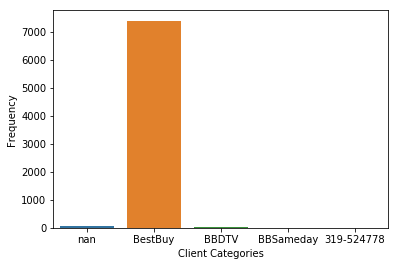

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(train_data_cleaned['Client1'])
plt.xlabel('Client Categories')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

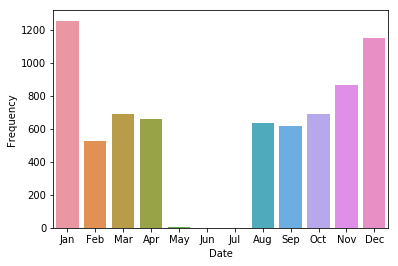

In [0]:
#Create a data dictionary to plot the bar char in the order to get a sense of distribution
di={"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12}
#Plot the data
sns.countplot(train_data_cleaned['Date1'],order=di.keys())
plt.xlabel('Date')
plt.ylabel('Frequency')

##Observations

Peak time of delivery seems to be in January and December.

May-July there seems to be no sales.

It could be because of the missing data

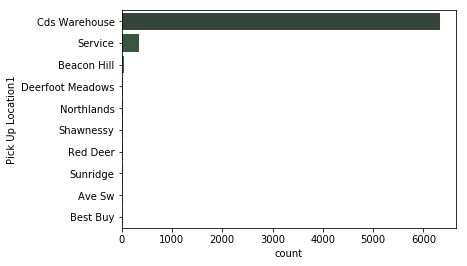

In [0]:


sns.countplot(y='Pick Up Location1',data=train_data_cleaned,palette='Greens_d',order=train_data_cleaned['Pick Up Location1'].value_counts().iloc[:10].index)

<Figure size 2880x2880 with 0 Axes>

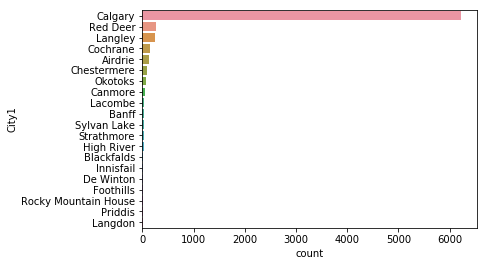

<Figure size 2880x2880 with 0 Axes>

In [0]:
sns.countplot(y='City1',data=train_data_cleaned,order=train_data_cleaned['City1'].value_counts().iloc[:20].index)
plt.figure(figsize=(40, 40))

In [0]:
train_data_cleaned['City1'].value_counts()

Calgary                 6228
Red Deer                 265
Langley                  250
Cochrane                 152
Airdrie                  125
Chestermere               87
Okotoks                   66
Canmore                   44
Lacombe                   40
Banff                     32
Sylvan Lake               30
Strathmore                23
High River                23
Blackfalds                13
Innisfail                 12
De Winton                 12
Foothills                 11
Rocky Mountain House      11
Priddis                    7
Langdon                    7
Sundre                     5
Bentley                    5
Heritage Pointe            4
Rimbey                     4
Stettler                   4
Turner Valley              4
Dalroy                     3
Conrich                    3
Black Diamond              3
Penhold                    3
Crossfield                 3
Ponoka                     2
Nan                        2
Hinton                     2
              

## TEXT FEATURIZATION USING BOW AND TF-IDF

In [0]:
#Function to find frequency of words

def find_frequencies(x,num):
  word_list=tokenize_words(x)
  words_grams=ngrams(word_list,num)
  flat_list=pd.Series(Counter(words_grams))
  flat_list=pd.DataFrame(flat_list).reset_index()
  flat_list.rename(columns={'index':'Word',0:'WordCount'},inplace=True)
  return flat_list

In [0]:
def tokenize_words(x):
  tokenized_words=x.apply(word_tokenize)
  tokenized_words_list=tokenized_words.to_list()
  flat_list=list(itertools.chain(*tokenized_words_list))
  return flat_list
  

In [0]:
train_data_cleaned['Products']=train_data_cleaned['Products'].str.replace(',','')
one_word=find_frequencies(train_data_cleaned['Products'],1)
two_word=find_frequencies(train_data_cleaned['Products'],2)
three_word=find_frequencies(train_data_cleaned['Products'],3)
four_word=find_frequencies(train_data_cleaned['Products'],4)

In [0]:
print(one_word[one_word['WordCount']>10])

          level_0  WordCount
0             TOP        567
1       WSHRDRYER         25
2             BAR         18
3         DISHWSH         45
4      DISHWASHER        331
6           MOUNT        262
7          FRIDGE        783
8           STEAM        190
9      DRYERSTEAM         41
10         WASHER        503
11            FRT         66
12           WSHR        107
14        FREZEER         14
15           ELEC        532
16           STEM        118
17           DRYR         84
18          DRYER        503
20         FAMILY         16
21            HUB         13
22        LAUNDRY         72
23         CENTER         53
24             TV        999
25          RANGE        582
26           CONV         41
27       STACKING         40
28            KIT         75
29           WITH         19
33           LOAD        324
34      WASHRELEC         37
37        UPRIGHT         44
...           ...        ...
748     ELECRNGSS         24
751           BLT         13
769      METDR

#FEATURIZATION

 ## 1) COUNT VECTORIZER
 
 LDA topic model algorithm requires a document word matrix as the main input.

I have configured the CountVectorizer to consider words that has occurred at least 10 times (min_df), remove built-in english stopwords.
So, to create the doc-word matrix, you need to first initialise the CountVectorizer class with the required configuration and then apply fit_transform to actually create the matrix.

Since most cells contain zeros, the result will be in the form of a sparse matrix to save memory.

If you want to materialize it in a 2D array format, call the todense() method of the sparse matrix like its done in the next step.

In [0]:
##Featurization using BOW
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=20,stop_words='english',ngram_range=(2,2))
vectorizer.fit(train_data_cleaned['Products'].values)
print("some feature names ", vectorizer.get_feature_names()[:10])
print('-'*100)

data_vectorized=vectorizer.transform(train_data_cleaned['Products'].values)
print("the type of count vectorizer ",type(data_vectorized))
print("the shape of out text BOW vectorizer ",data_vectorized.get_shape())
print("the number of unique words ", data_vectorized.get_shape()[1])

some feature names  ['ascenta dishwasher', 'bultin dishwr', 'chest freezer', 'chest frzr', 'coffee table', 'convection range', 'cst treadmill', 'door fridge', 'door ref', 'door refer']
----------------------------------------------------------------------------------------------------
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (7511, 60)
the number of unique words  60


##2) Check the Sparsicity

In [0]:
data_dense=data_vectorized.todense()
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  1.8308631211857016 %


In [0]:
data_dense[0]

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [0]:
from sklearn.decomposition import LatentDirichletAllocation
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=8,               # Number of topics
                                      max_iter=10,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=8, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


##3)  Diagnose model performance with perplexity and log-likelihood
A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good. Let’s check for our model.

In [0]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))


# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
print(lda_model.get_params())

Log Likelihood:  -9950.94481841906
Perplexity:  56.0062400643129
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 8, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


#4)How to GridSearch the best LDA model?

The most important tuning parameter for LDA models is n_components (number of topics). In addition, I am going to search learning_decay (which controls the learning rate) as well.

Besides these, other possible search params could be learning_offset (downweigh early iterations. Should be > 1) and max_iter. These could be worth experimenting if you have enough computing resources.

Be warned, the grid search constructs multiple LDA models for all possible combinations of param values in the param_grid dict. So, this process can consume a lot of time and resources.



In [0]:
from sklearn.model_selection import GridSearchCV
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                   

In [0]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 10}
Best Log Likelihood Score:  -3629.304580192886
Model Perplexity:  55.09668787904666


In [0]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()

# View
df_topic_keywords.head()

,ascenta dishwasher,bultin dishwr,chest freezer,chest frzr,coffee table,convection range,cst treadmill,door fridge,door ref,door refer,dryerdryer duct,dryerfront load,dryersteam washer,dryertop load,ele range,elec dryer,elec range,elec rng,elec rnge,elec stem,french door,fridge frnch,frnch fridge,frnt load,gas range,hosesdryer duct,integrated dishwasher,laundry center,load washer,load wshr,mclean elec,mcln ele,mnt frdg,mnt fridge,mount fridge,mount refr,oled tv,otr microwave,quadwash dishwasher,scp dishwsh,semi integrated,smart tv,stainless steel,steam dryer,steam washer,steam washerdryer,steam washrelec,steel hoses,steel hosesdryer,stem dryr,stem dryrsteam,tall tub,theframe tv,true convection,tub dish,upright frzr,wall oven,washer dryer,washersteel hoses,washrelec stem
0,26.1,0.1,0.1,45.1,0.1,0.1,0.1,35.099997,25.099998,0.1,0.100001,0.100002,0.1,0.100000,0.1,0.1,0.100000,0.1,0.1,0.1,76.100332,0.1,0.1,0.1,0.1,0.100000,0.100001,45.1,0.100000,0.100001,0.100000,0.100000,0.100000,0.1,0.1,0.100000,0.1,0.100001,0.1,0.1,0.100001,0.1,0.100003,0.100000,0.1,27.1,0.1,32.099978,0.100000,0.1,0.100001,0.100000,0.1,0.100002,0.1,0.1,0.1,0.100000,0.100000,0.1
1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.100000,0.100000,0.1,0.100000,0.100002,0.1,0.100000,0.1,0.1,0.100000,0.1,0.1,0.1,0.100000,30.1,0.1,0.1,0.1,0.100000,0.100000,0.1,0.100000,0.100000,0.100001,0.100003,139.099999,0.1,81.1,0.100000,0.1,0.100000,0.1,0.1,0.100002,0.1,0.100000,0.100000,0.1,0.1,0.1,0.100000,0.100000,0.1,0.100000,0.100000,0.1,0.100000,0.1,0.1,0.1,0.100000,32.099997,0.1
2,0.1,28.1,0.1,0.1,0.1,0.1,0.1,0.100000,0.100000,0.1,0.100001,0.100000,0.1,0.100001,0.1,0.1,0.100000,0.1,0.1,0.1,0.100000,0.1,0.1,0.1,0.1,0.100001,0.100000,0.1,0.100001,0.100000,0.100004,0.100000,0.100000,0.1,0.1,102.099999,0.1,0.100000,0.1,0.1,0.100000,0.1,38.099988,0.100000,0.1,0.1,0.1,0.100009,0.100009,0.1,0.100000,0.100000,0.1,0.100000,0.1,0.1,24.1,0.100000,0.100000,0.1
3,0.1,0.1,89.1,0.1,0.1,0.1,0.1,0.100000,0.100000,0.1,0.100000,24.099986,0.1,0.100001,0.1,0.1,0.100004,0.1,0.1,0.1,0.100000,0.1,0.1,0.1,0.1,0.100000,0.100000,0.1,0.100005,0.100000,26.099985,0.100000,0.100000,0.1,0.1,0.100001,0.1,0.100000,0.1,0.1,0.100000,0.1,0.100000,21.099999,0.1,0.1,0.1,0.100003,0.100001,0.1,0.100000,37.099997,0.1,0.100000,22.1,0.1,0.1,0.100000,0.100002,0.1
4,0.1,0.1,0.1,0.1,0.1,0.1,37.1,0.100000,0.100000,0.1,0.100000,0.100000,0.1,0.100003,0.1,0.1,0.100000,0.1,0.1,0.1,0.100000,0.1,0.1,0.1,0.1,0.100000,0.100000,0.1,0.100001,0.100000,0.100000,0.100000,0.100000,95.1,0.1,0.100000,0.1,0.100000,0.1,0.1,0.100000,0.1,0.100000,0.100000,0.1,0.1,0.1,0.100000,0.100000,0.1,0.100000,0.100001,0.1,0.100000,0.1,22.1,0.1,35.099998,0.100000,0.1


In [0]:
import numpy as np
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,french door,chest frzr,laundry center,door fridge,steel hoses,steam washerdryer,ascenta dishwasher,door ref,stainless steel,dryerfront load,true convection,semi integrated,stem dryrsteam,integrated dishwasher,dryerdryer duct
Topic 1,mnt frdg,mount fridge,washersteel hoses,fridge frnch,mcln ele,semi integrated,dryerfront load,mclean elec,steel hosesdryer,oled tv,elec range,french door,frnch fridge,ascenta dishwasher,steam washerdryer
Topic 2,mount refr,stainless steel,bultin dishwr,wall oven,steel hosesdryer,steel hoses,mclean elec,load washer,dryerdryer duct,dryertop load,hosesdryer duct,washrelec stem,stem dryr,oled tv,elec range
Topic 3,chest freezer,tall tub,mclean elec,dryerfront load,tub dish,steam dryer,load washer,elec range,steel hoses,washersteel hoses,steel hosesdryer,dryertop load,mount refr,mount fridge,load wshr
Topic 4,mnt fridge,cst treadmill,washer dryer,upright frzr,dryertop load,load washer,tall tub,steel hosesdryer,oled tv,elec range,french door,frnch fridge,ascenta dishwasher,steam washerdryer,smart tv
Topic 5,load washer,smart tv,true convection,integrated dishwasher,convection range,frnch fridge,semi integrated,dryerfront load,dryertop load,door fridge,stainless steel,washer dryer,steel hoses,washersteel hoses,otr microwave
Topic 6,gas range,elec rnge,dryersteam washer,elec stem,stem dryrsteam,quadwash dishwasher,stem dryr,steel hoses,hosesdryer duct,steel hosesdryer,load wshr,oled tv,elec range,french door,frnch fridge
Topic 7,elec range,stem dryr,hosesdryer duct,oled tv,washrelec stem,steam washrelec,steel hosesdryer,mclean elec,stainless steel,elec stem,frnt load,stem dryrsteam,french door,frnch fridge,ascenta dishwasher
Topic 8,load wshr,elec dryer,otr microwave,scp dishwsh,frnt load,door refer,french door,dryertop load,steel hoses,steel hosesdryer,door ref,convection range,hosesdryer duct,stem dryrsteam,tall tub
Topic 9,elec rng,dryertop load,dryerdryer duct,mcln ele,ele range,steel hosesdryer,steam washer,theframe tv,coffee table,load wshr,load washer,stainless steel,stem dryrsteam,washer dryer,steam dryer


# USING K MEANS CLUSTERING

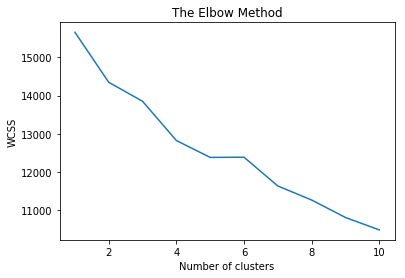

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data_vectorized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(data_vectorized)
words=vectorizer.get_feature_names()
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : mount refr, mclean elec, washrelec stem, elec dryer, integrated dishwasher, hosesdryer duct, gas range, frnt load, frnch fridge, fridge frnch, french door, elec stem, elec rnge, elec rng, elec range, ele range, load washer, dryertop load, dryersteam washer, dryerfront load, dryerdryer duct, door refer, door ref, door fridge, cst treadmill
1 : mnt fridge, chest freezer, french door, mount fridge, load wshr, smart tv, laundry center, chest frzr, stem dryr, elec dryer, hosesdryer duct, cst treadmill, tall tub, steel hosesdryer, oled tv, true convection, stainless steel, gas range, door fridge, convection range, washer dryer, integrated dishwasher, washersteel hoses, elec rnge, otr microwave
2 : mnt frdg, mcln ele, semi integrated, washrelec stem, elec dryer, hosesdryer duct, gas range, frnt load, frnch fridge, fridge frnch, french door, elec stem, elec rnge, elec rng, elec range, ele range, laundry center, dryertop load, dryersteam washer, dryerfront load, dryerdryer duct, door refer,